In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:70% !important}</style>"
HTML(style)

In [17]:
train_iris = pd.read_csv('train_iris.csv', index_col=0)
test_iris = pd.read_csv('test_iris.csv', index_col=0)
train_iris

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [18]:
np.random.seed(0)

In [19]:
X = train_iris.drop('species', axis=1)
y = train_iris.species
X_test = test_iris.drop('species', axis=1)
y_test = test_iris.species
scores_data = pd.DataFrame()

In [20]:
for currnt_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=currnt_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_test, y_test)
    temp_output = pd.DataFrame({'depth':[currnt_depth],'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_output)

In [21]:
scores_data

,depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


In [23]:
scores_data = pd.melt(scores_data, id_vars=['depth'], value_vars=['train_score', 'test_score'], var_name='score_type', value_name='score')

In [24]:
scores_data

,depth,score_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


<AxesSubplot:xlabel='depth', ylabel='score'>

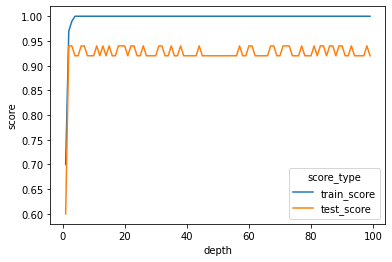

In [26]:
sns.lineplot(data=scores_data, x='depth', y='score', hue='score_type')